# **Práctica 1**: Clasificación de tumores

---

## Enunciado

Se desea desarrollar una inteligencia artificial capaz de **detectar el tipo de tumor**, benigno o maligno, dependiendo de las características de la masa detectada. Para ello se tiene un **dataset** que contiene datos sobre distintos casos **etiquetados**.

Es importante para los médicos saber cómo se toman las decisiones para saber si un tumor es maligno o benigno, así que se debe dar una **explicación** de lo que ha **aprendido** el algoritmo de los datos.

Por lo tanto se pide diseñar un algoritmo que sea capaz de realizar **identificaciones futuras** con datos de nuevos pacientes.

Se pide:

* **Identificar** el tipo de problema con el que se está tratando.
* **Procesar** los datos, si se considera necesario, para que puedan ser tratados por la Inteligencia Artificial de manera adecuada.
* Desarrollar un algoritmo de **Machine Learning** que **separe** los tumores como benignos o malignos.
* **Justificar** las decisiones tomadas en cada momento.
* **Estudiar y justificar** qué variables son las que más peso tienen a la hora de identificar un tumor como benigno o maligno. Tambien se debe aportar una justificación de qué variables tienen qué peso en la dicisión final.
* **Evaluar** el rendimiento del algoritmo.

---

## Evaluación

Se evaluará la práctica de la siguiente manera:

* **Identificación del problema** (30%): El alumno deberá identificar el problema al que se enfrenta, de entre los tipos de problemas vistos en clase. Deberá justificar el por qué de dicha identificación.
* **Diseño de algoritmos de ML** (50%): Se corregirá la adecuación de el(los) algoritmo(s) escogido(s) para solucionar el problema en cuestión, así como posibles elecciones de hiperparámetros. Se evaluará positivamente probar distintos algoritmos.
* **Evaluación de los algoritmos** (20%): Se evaluarán los algoritmos diseñados de manera que se justifique su posible futuro rendimiento cuando el algoritmo se ponga en producción.

El alumno deberá entregar el **presente notebook** con el nombre *{apellido1_nombre}_Practica_1.ipynb*  a la tarea de Moodle correspondiente. En dicho notebook deberá **aparecer** el **código con el que se resuelve el problema** así como las **justificaciones, decisiones y aclaraciones** del mismo.

Recordar que el alumno deberá **responder explícitamente** a las preguntas de identificación, diseño y evaluación.

In [25]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Carga de datos
Se accede al dataset directamente desde la libreria *sklearn*.

In [26]:
dataset = load_breast_cancer()

In [27]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [28]:
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [29]:
print(dataset['data'].shape)
print(dataset['target'].shape)

(569, 30)
(569,)


---

Creado por **Guillermo Iglesias** (guillermo.iglesias@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">

Estamos ante un problema de clasificación binaria, concretamente una clasificación estadística binaria. Tenemos un conjunto de atributos y unas categorías predefinidas, por lo que hay que implementar uno o varios algoritmos de aprendizaje supervisado. Además es importante remarcar que estos algoritmos tienen que ser clasificadores, no estamos ante un problema de regresión. Un problema de regresión trataría de relacionar un cierto número de características con una variable objetivo que es continua, nosotros tenemos como objetivo determinar un 0 o un 1 al fin y al cabo.

In [30]:
# Primero voy a ver que pinta tienen los datos que tengo

print(dataset['data'])
print(dataset['target'])
print(dataset['target_names'])
print(dataset['feature_names'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

Aquí puedo ver que en data tengo los valores de los 30 atributos de cada uno de los 569 casos.

En target la etiqueta de cada caso, 0 o 1 en función de si es maligno o benigno.

Lo pongo en un dataframe para observar mejor que pinta tienen mis datos.

In [31]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])

In [32]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
df.insert(loc = 0, column = 'Diagnosis', value = dataset['target'])

In [36]:
df

,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Observamos algunos valores que son 0, pero en el caso en el que estamos, tiene sentido y aporta significado si algún atributo tiene valor 0, por lo que no los vamos a eliminar del dataset.


Podemos observar cómo de importantes son las variables haciendo un mapa de correlación



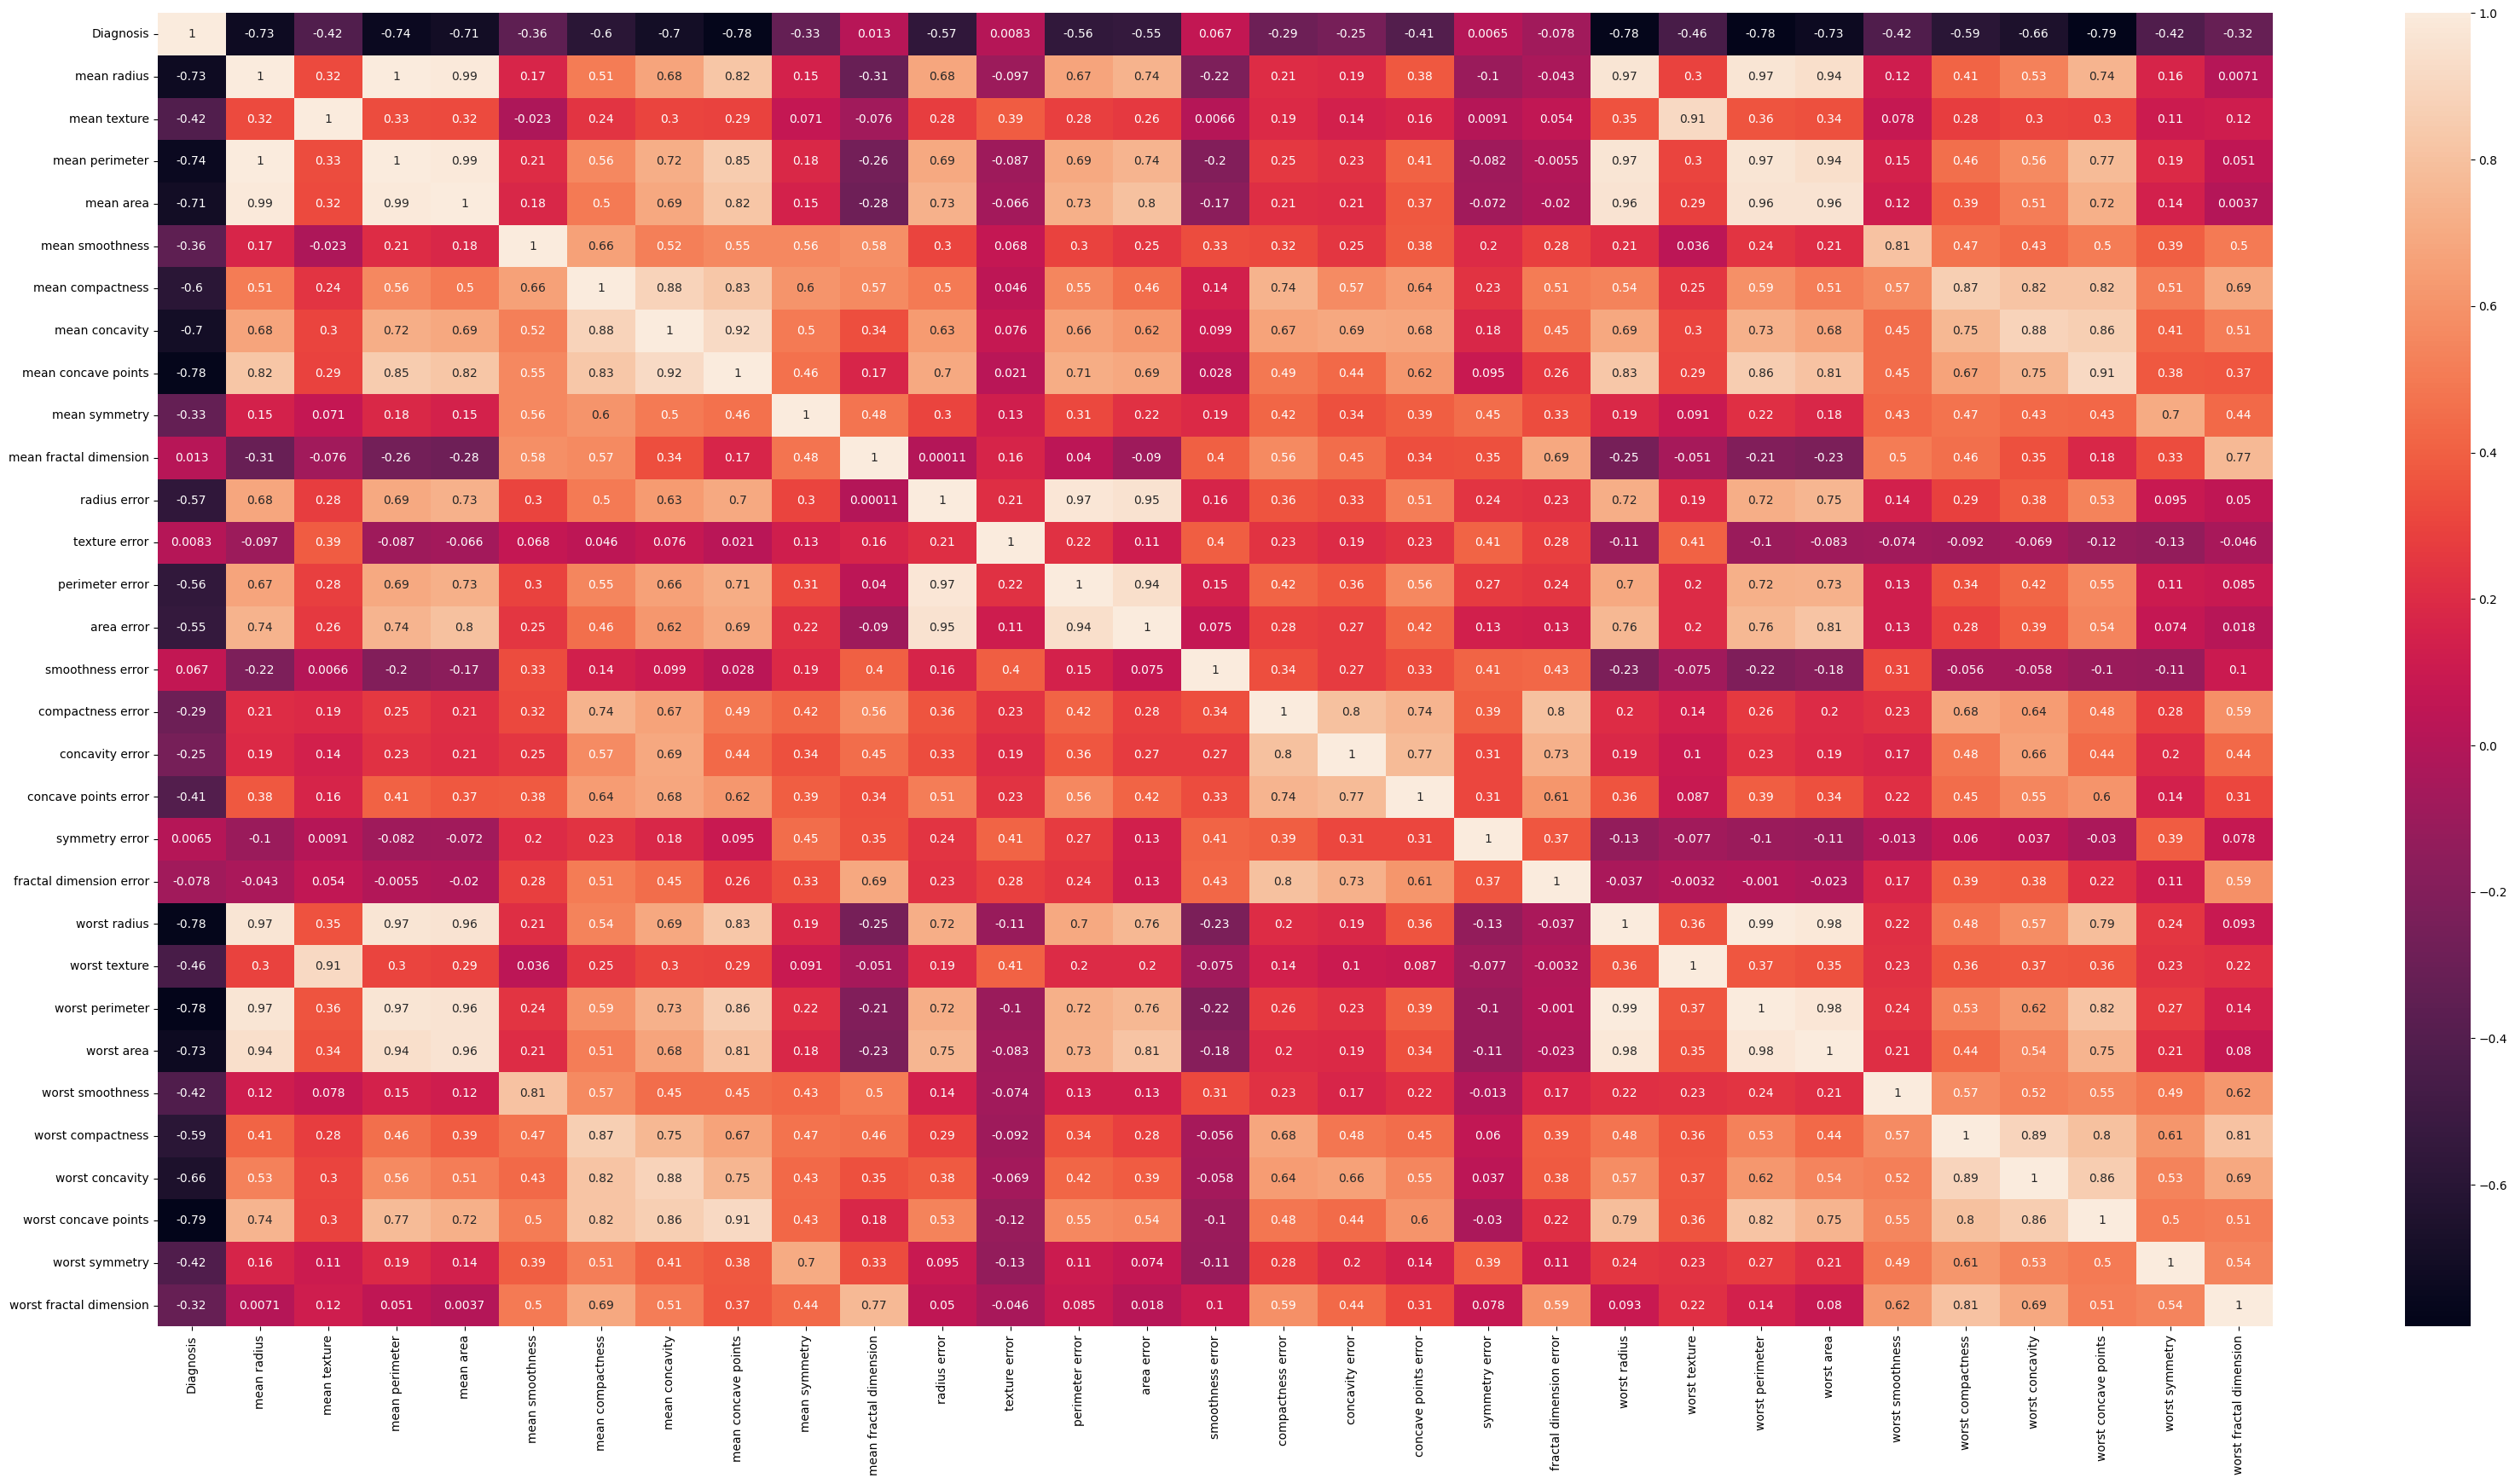

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)
plt.gcf().set_size_inches(40,20)

Las variables que tienen algún 0 no son muy relevantes (concavity y concave) pero no las quitamos porque tiene sentido que en algunos casos estos atributos sean 0.

In [40]:
# Preparamos los datos para crear nuestro modelo.

# Dividimos el dataset

from sklearn.model_selection import train_test_split
from keras import layers, utils, optimizers


X = dataset['data']
Y = dataset['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


Aquí ya he dividido mis datos en entrenamiento y los de prueba

In [42]:
print(X_train)

[[1.185e+01 1.746e+01 7.554e+01 ... 9.140e-02 3.101e-01 7.007e-02]
 [1.122e+01 1.986e+01 7.194e+01 ... 2.022e-02 3.292e-01 6.522e-02]
 [2.013e+01 2.825e+01 1.312e+02 ... 1.628e-01 2.572e-01 6.637e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]


In [43]:
# Vamos a estandarizar el data y a poner en un formato que me sirva el target

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

labelenc = preprocessing.LabelEncoder()
Y_train = labelenc.fit_transform(Y_train)
Y_test = labelenc.fit_transform(Y_test)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [48]:
X_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [44]:
Y_train

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

Aquí lo que se ha hecho es estandarizar los valores de los atributos, es decir, cambiar la distribución para que tengan media 0 y desviación estandar 1.

Se pueden hacer otros cambios de distribución como escalarlos en función del mínimo o el máximo o como hacerles una normalización.

Escalar en función del máximo y el mínimo funciona parecido a la estandarización y normalizar nos "aplana" los valores, los cambia mucho de escala y no nos interesa en este caso.

Para las etiquetas me he asegurado que las codificaba en 0 y 1 aunque creo ya venían dadas así y he usado labelenc porque es el adecuado para una lista de etiquetas

In [45]:
# Creamos una función para almacenar diferentes modelos y clasificarlos

def modelos(X_train, Y_train):

  # Logistic Regression

  from sklearn.linear_model import LogisticRegression

  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)

  # Clasificador KNeighborns

  from sklearn.neighbors import KNeighborsClassifier

  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  # Support vector classifier

  from sklearn.svm import SVC

  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  # Support vector machine with radial basis function kernel

  from sklearn.svm import SVC

  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  # Naive Bayes Gausiano

  from sklearn.naive_bayes import GaussianNB

  gaussian_nb = GaussianNB()
  gaussian_nb.fit(X_train, Y_train)

  # Decission Tree Classifier

  from sklearn.tree import DecisionTreeClassifier

  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  # Random Forest

  from sklearn.ensemble import RandomForestClassifier

  forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  return log, knn, svc_lin, svc_rbf, gaussian_nb, tree, forest



No usamos regresion lineal ni DecisionTreeRegressor porque luego queremos obtener una metrica una CLASIFICACIÓN, hay que usar clasificadores, no regresores.

Y bueno, ahí están los que uso: regresión logística que sería la adaptación de la regresión lineal pero para una clasificación binaria; K-vecinos con métrica minkowski, SVC que la máquina de vectores de soporte pero con kernel lineal (sorprendentemente funciona bastante bien) y SVM que mapea las X entradas a un espacio con más dimensiones (uso función de base radial gaussiana porque parece la más 'sofisticada' ya separa o clasifica con un hiperplano en el espacio transformado).

También uso naive bayes, árbol de decisión en su versión clasificador y bosques aleatorios que son los otros modelos que hemos visto para clasificación.


In [46]:
# Creamos el modelo y comprobamos su puntuación

model = modelos(X_train, Y_train)

print('Logistic Regression Precisión:', model[0].score(X_train, Y_train))
print('K nearest neighbor Precisión:', model[1].score(X_train, Y_train))
print('Support Vector Classifier Precisión:', model[2].score(X_train, Y_train))
print('RBF Support Vector Machine Precisión:', model[3].score(X_train, Y_train))
print('Gaussian Naive Bayes Precisión:', model[4].score(X_train, Y_train))
print('Decision Tree Classifier Regression Precisión:', model[5].score(X_train, Y_train))
print('Random Forest Classifier Precisión:', model[6].score(X_train, Y_train))

Logistic Regression Precisión: 0.9906103286384976
K nearest neighbor Precisión: 0.9741784037558685
Support Vector Classifier Precisión: 0.9859154929577465
RBF Support Vector Machine Precisión: 0.9859154929577465
Gaussian Naive Bayes Precisión: 0.9483568075117371
Decision Tree Classifier Regression Precisión: 1.0
Random Forest Classifier Precisión: 1.0


Otra característica importante para conocer la calidad del modelo es la matriz de confusión, que nos dice cuantos aciertos y cuantos errores de cada categoría ha tenido nuestro modelo.

In [47]:
# Construimos matriz de confusión

from sklearn.metrics import confusion_matrix

for i in range(len(model)):

  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FP = cm[0][1]
  FN = cm[1][0]

  print('Matriz de confusión')
  print(cm)
  precision = (TP + TN) / (TP + TN + FP + FN)
  print('Precisión modelo', i, ':', '', precision)


Matriz de confusión
[[51  2]
 [ 4 86]]
Precisión modelo 0 :  0.958041958041958
Matriz de confusión
[[47  6]
 [ 1 89]]
Precisión modelo 1 :  0.951048951048951
Matriz de confusión
[[51  2]
 [ 5 85]]
Precisión modelo 2 :  0.951048951048951
Matriz de confusión
[[50  3]
 [ 2 88]]
Precisión modelo 3 :  0.965034965034965
Matriz de confusión
[[48  5]
 [ 4 86]]
Precisión modelo 4 :  0.9370629370629371
Matriz de confusión
[[50  3]
 [ 5 85]]
Precisión modelo 5 :  0.9440559440559441
Matriz de confusión
[[52  1]
 [ 4 86]]
Precisión modelo 6 :  0.965034965034965


La precisión será la suma de los aciertos (verdaderos positivos + verdaderos negativos) entre el numero total de casos

La precisión y matriz de confusión no son los únicos factores que determinan la calidad de un modelo por lo que buscamos algunas características extra que nos ayuden a elegir el mejor de estos

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range (len(model)):

  print('Model ',  i)
  print(classification_report(Y_test, model[i].predict(X_test)))

  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print() #Separo una linea


Model  0
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958

Model  1
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model  2
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        53
           1       0.98      0.94      0.96        90

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted 

Como vemos nuestros mejores modelos son el SVC y el Random Forest ambos con una precisión del 96,5%